In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
# TODO: Use python PathLib to use 
DATA_PATH = '../data/'

## Load Beijing Air Quality

In [3]:
beijing_17_18_aq = pd.read_csv(DATA_PATH + 'raw/Beijing/beijing_17_18_aq.csv', parse_dates=['utc_time'])
beijing_802_803_aq = pd.read_csv(DATA_PATH + 'raw/Beijing/beijing_201802_201803_aq.csv', parse_dates=['utc_time'])

In [4]:
beijing_17_18_aq.head()

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,2017-01-01 15:00:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,2017-01-01 16:00:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,2017-01-01 17:00:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,2017-01-01 18:00:00,453.0,520.0,157.0,7.6,4.0,9.0


In [5]:
beijing_17_18_aq.utc_time.min(), beijing_17_18_aq.utc_time.max()

(Timestamp('2017-01-01 14:00:00'), Timestamp('2018-01-31 15:00:00'))

In [6]:
beijing_802_803_aq.head()

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,2018-01-31 16:00:00,49.0,82.0,90.0,0.9,6.0,10.0
1,aotizhongxin_aq,2018-01-31 17:00:00,47.0,80.0,90.0,0.9,5.0,10.0
2,aotizhongxin_aq,2018-01-31 18:00:00,46.0,91.0,91.0,1.3,5.0,28.0
3,aotizhongxin_aq,2018-01-31 19:00:00,60.0,95.0,85.0,2.0,6.0,38.0
4,aotizhongxin_aq,2018-01-31 20:00:00,52.0,91.0,81.0,1.9,5.0,30.0


In [7]:
beijing_802_803_aq.utc_time.min(), beijing_802_803_aq.utc_time.max()

(Timestamp('2018-01-31 16:00:00'), Timestamp('2018-03-31 15:00:00'))

## Union Beijing Air Quality Data

In [8]:
def rename_aq_df(df):
    return df.rename(columns={'stationId': 'station_id', 'utc_time': 'utc_datetime'})

Rename and concatenate both airquality data tables

In [9]:
beijing_17_18_aq = rename_aq_df(beijing_17_18_aq)
beijing_802_803_aq = rename_aq_df(beijing_802_803_aq)

beijing_aq_data = pd.concat([beijing_17_18_aq, beijing_802_803_aq], ignore_index=True)
beijing_aq_data.shape

(360430, 8)

### Drop duplicated rows

In [10]:
beijing_aq_data = beijing_aq_data.drop_duplicates()
beijing_aq_data.shape

(353955, 8)

### Save as interim feather file

In [11]:
# `to_feather` won't accept the index after `drop_duplicates`. Had to `reset_index()` and drop the current index.

beijing_aq_data.reset_index().drop('index', axis=1).to_feather(DATA_PATH + 'interim/beijing_aq_union.feather')

In [4]:
beijing_aq_data = pd.read_feather(DATA_PATH + 'interim/beijing_aq_union.feather')

In [5]:
beijing_aq_data.head()

,station_id,utc_datetime,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,2017-01-01 15:00:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,2017-01-01 16:00:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,2017-01-01 17:00:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,2017-01-01 18:00:00,453.0,520.0,157.0,7.6,4.0,9.0


In [14]:
beijing_aq_data.utc_datetime.min(), beijing_aq_data.utc_datetime.max()

(Timestamp('2017-01-01 14:00:00'), Timestamp('2018-03-31 15:00:00'))

## Loading Grid Weather Data

In [15]:
beijing_meo_grid = pd.read_csv(DATA_PATH + 'raw/Beijing/Beijing_historical_meo_grid.csv', parse_dates=['utc_time'])

In [16]:
beijing_meo_grid.head()

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,beijing_grid_000,115.0,39.0,2017-01-01,-5.47,984.73,76.60,53.71,3.53
1,beijing_grid_001,115.0,39.1,2017-01-01,-5.53,979.33,75.40,43.59,3.11
2,beijing_grid_002,115.0,39.2,2017-01-01,-5.70,963.14,71.80,0.97,2.75
3,beijing_grid_003,115.0,39.3,2017-01-01,-5.88,946.94,68.20,327.65,3.84
4,beijing_grid_004,115.0,39.4,2017-01-01,-5.34,928.80,58.81,317.85,6.14


In [17]:
beijing_meo_grid.utc_time.min(), beijing_meo_grid.utc_time.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2018-03-27 05:00:00'))

### Rename Grid Weather Data

In [18]:
def rename_weather_data(df):
    return df.rename(columns={'stationName': 'station_id', 'utc_time': 'utc_datetime', 'wind_speed/kph': 'wind_speed'})

In [19]:
beijing_meo_grid = rename_weather_data(beijing_meo_grid)
beijing_meo_grid = beijing_meo_grid.drop_duplicates()

In [20]:
beijing_meo_grid.head()

,station_id,longitude,latitude,utc_datetime,temperature,pressure,humidity,wind_direction,wind_speed
0,beijing_grid_000,115.0,39.0,2017-01-01,-5.47,984.73,76.60,53.71,3.53
1,beijing_grid_001,115.0,39.1,2017-01-01,-5.53,979.33,75.40,43.59,3.11
2,beijing_grid_002,115.0,39.2,2017-01-01,-5.70,963.14,71.80,0.97,2.75
3,beijing_grid_003,115.0,39.3,2017-01-01,-5.88,946.94,68.20,327.65,3.84
4,beijing_grid_004,115.0,39.4,2017-01-01,-5.34,928.80,58.81,317.85,6.14


### Save as interim feather file

In [21]:
# `to_feather` won't accept the index after `drop_duplicates`. Had to `reset_index()` and drop the current index.

beijing_meo_grid.reset_index().drop('index', axis=1).to_feather(DATA_PATH + 'interim/beijing_meo_grid.feather')

In [6]:
beijing_meo_grid = pd.read_feather(DATA_PATH + 'interim/beijing_meo_grid.feather')

## Loading Observed Weather Data

In [23]:
beijing_meo_observed_17_18 = pd.read_csv(DATA_PATH + 'raw/Beijing/beijing_17_18_meo.csv', parse_dates=['utc_time'])
beijing_meo_observed_802_803 = pd.read_csv(DATA_PATH + 'raw/Beijing/beijing_201802_201803_me.csv', parse_dates=['utc_time'])

In [24]:
beijing_meo_observed_17_18.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [25]:
beijing_meo_observed_17_18.station_id.unique()

array(['shunyi_meo', 'hadian_meo', 'yanqing_meo', 'miyun_meo',
       'huairou_meo', 'shangdianzi_meo', 'pinggu_meo', 'tongzhou_meo',
       'chaoyang_meo', 'pingchang_meo', 'zhaitang_meo', 'mentougou_meo',
       'beijing_meo', 'shijingshan_meo', 'fengtai_meo', 'daxing_meo',
       'fangshan_meo', 'xiayunling_meo'], dtype=object)

In [26]:
beijing_meo_observed_17_18.utc_time.min(), beijing_meo_observed_17_18.utc_time.max()

(Timestamp('2017-01-30 16:00:00'), Timestamp('2018-01-31 15:00:00'))

In [27]:
beijing_meo_observed_802_803.head()

,station_id,utc_time,weather,temperature,pressure,humidity,wind_speed,wind_direction
0,beijing_meo,2018-01-31 16:00:00,Sunny/clear,-4.8,1023.9,39,0.9,59
1,beijing_meo,2018-01-31 17:00:00,Sunny/clear,-6.1,1023.4,42,0.0,999017
2,beijing_meo,2018-01-31 18:00:00,Sunny/clear,-7.0,1023.1,45,0.5,178
3,beijing_meo,2018-01-31 19:00:00,Haze,-7.7,1022.8,47,0.0,999017
4,beijing_meo,2018-01-31 20:00:00,Sunny/clear,-6.3,1022.4,44,2.0,71


In [28]:
beijing_meo_observed_802_803.utc_time.min(), beijing_meo_observed_802_803.utc_time.max()

(Timestamp('2018-01-31 16:00:00'), Timestamp('2018-04-01 00:00:00'))

In [29]:
beijing_meo_observed_802_803.station_id.unique()

array(['beijing_meo', 'chaoyang_meo', 'daxing_meo', 'fangshan_meo',
       'fengtai_meo', 'hadian_meo', 'huairou_meo', 'mentougou_meo',
       'miyun_meo', 'pingchang_meo', 'pinggu_meo', 'shangdianzi_meo',
       'shijingshan_meo', 'shunyi_meo', 'tongzhou_meo', 'xiayunling_meo',
       'yanqing_meo', 'zhaitang_meo'], dtype=object)

### Union observed weather data 

In [30]:
beijing_meo_observed_17_18 = rename_weather_data(beijing_meo_observed_17_18)
beijing_meo_observed_802_803 = rename_weather_data(beijing_meo_observed_802_803)

In [31]:
beijing_observed_meo_union = pd.concat([beijing_meo_observed_17_18, beijing_meo_observed_802_803], sort=False)
beijing_observed_meo_union = beijing_observed_meo_union.drop_duplicates()
beijing_observed_meo_union.head()

,station_id,longitude,latitude,utc_datetime,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


### Save as interim feather file

In [32]:
beijing_observed_meo_union.reset_index().drop('index', axis=1).to_feather(DATA_PATH + 'interim/beijing_meo_observed_union.feather')

In [7]:
beijing_observed_meo_union = pd.read_feather(DATA_PATH + 'interim/beijing_meo_observed_union.feather')
beijing_observed_meo_union.head()

,station_id,longitude,latitude,utc_datetime,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


## Remove/correct outliers

### Weather outliers

In [34]:
beijing_observed_meo_union.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,183680.000000,183680.000000,183680.000000,183446.000000,183446.000000
mean,116.395672,40.047275,33.294884,1023.931712,310.017247,36052.241292,83.678902
std,0.395223,0.264798,4666.502794,4661.909456,16162.668763,185870.848379,9042.190956
min,115.692222,39.718611,-21.300000,940.000000,3.000000,0.000000,0.000000
25%,116.194167,39.847500,1.100000,994.600000,26.000000,78.000000,0.900000
50%,116.290556,39.973889,11.400000,1006.700000,45.000000,189.000000,1.500000
75%,116.626944,40.223333,22.000000,1017.500000,70.000000,279.000000,2.500000
max,117.117778,40.658889,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


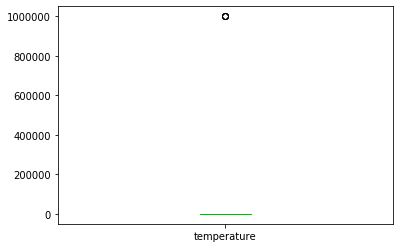

In [35]:
# TODO: Show outliers using boxplot of temperature, pressure, humidity, wind_direction and wind_speed
beijing_observed_meo_union.temperature.plot.box()

In [36]:
beijing_observed_meo_union[beijing_observed_meo_union.temperature > 800000]

,station_id,longitude,latitude,utc_datetime,temperature,pressure,humidity,wind_direction,wind_speed,weather
83989,pingchang_meo,116.211667,40.223333,2017-08-25 13:00:00,999999.0,999999.0,999999,999999.0,999999.0,Sunny/clear
106220,beijing_meo,116.469444,39.806111,2017-03-07 07:00:00,999999.0,999999.0,999999,999999.0,999999.0,Sunny/clear
107196,beijing_meo,116.469444,39.806111,2017-04-17 00:00:00,999999.0,999999.0,999999,999999.0,999999.0,Sunny/clear
110197,beijing_meo,116.469444,39.806111,2017-08-20 03:00:00,999999.0,999999.0,999999,999999.0,999999.0,Sunny/clear


Wind direction is measured in degrees clockwise from due north and so a wind coming from the south has a wind direction of 180 degrees; one from the east is 90 degrees, etc. **If the wind speed is less than 0.5m/s (nearly no wind), the value of the wind_direction is 999017.**

In [37]:
beijing_observed_meo_union[beijing_observed_meo_union.wind_direction == 999017].head()

,station_id,longitude,latitude,utc_datetime,temperature,pressure,humidity,wind_direction,wind_speed,weather
19,shunyi_meo,116.615278,40.126667,2017-01-31 11:00:00,-2.2,1024.9,34,999017.0,0.2,Haze
44,shunyi_meo,116.615278,40.126667,2017-02-01 12:00:00,-2.8,1032.3,41,999017.0,0.1,Sunny/clear
45,shunyi_meo,116.615278,40.126667,2017-02-01 13:00:00,-4.8,1032.0,52,999017.0,0.0,Sunny/clear
66,shunyi_meo,116.615278,40.126667,2017-02-02 10:00:00,0.7,1023.6,32,999017.0,0.0,Sunny/clear
67,shunyi_meo,116.615278,40.126667,2017-02-02 11:00:00,-1.5,1023.9,44,999017.0,0.0,Haze


In [38]:
def process_observed_meo_outliers(df):
    df = df[df.temperature < 800000]
    df.loc[:, 'wind_direction'] = df.replace(999017, 0)
    return df

beijing_observed_meo_union = process_observed_meo_outliers(beijing_observed_meo_union)   

/Users/mjjim2003/Documents/Eskwelabs/Capstone_Project/Air_Quality/KDD_Air_Quality/kdd_air_quality/env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:
beijing_observed_meo_union.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158043.000000,158043.000000,183676.000000,183676.000000,183676.000000,183442.000000,183442.000000
mean,116.395672,40.047279,11.518153,1002.176555,288.246543,229.509611,61.875491
std,0.395227,0.264799,12.071890,20.535550,15474.915980,7742.910599,7743.438601
min,115.692222,39.718611,-21.300000,940.000000,3.000000,0.000000,0.000000
25%,116.194167,39.847500,1.100000,994.600000,26.000000,67.000000,0.900000
50%,116.290556,39.973889,11.400000,1006.700000,45.000000,177.000000,1.500000
75%,116.626944,40.223333,22.000000,1017.500000,70.000000,260.000000,2.500000
max,117.117778,40.658889,40.300000,1039.700000,999999.000000,999999.000000,999999.000000


### Save as interim feather file

In [40]:
beijing_observed_meo_union.reset_index().drop('index', axis=1).to_feather(DATA_PATH + 'interim/beijing_meo_observed_union.feather')

In [41]:
beijing_observed_meo_union = pd.read_feather(DATA_PATH + 'interim/beijing_meo_observed_union.feather')
beijing_observed_meo_union.head()

,station_id,longitude,latitude,utc_datetime,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


### Air Quality Outliers

In [42]:
beijing_aq_data.describe()

,PM2.5,PM10,NO2,CO,O3,SO2
count,331121.000000,259175.000000,332831.000000,308390.000000,330810.000000,332879.000000
mean,61.191407,91.342772,46.066382,0.971086,55.052323,9.199598
std,67.385924,103.024487,32.246534,0.973267,51.610243,11.596243
min,2.000000,5.000000,1.000000,0.100000,1.000000,1.000000
25%,16.000000,38.000000,20.000000,0.400000,13.000000,2.000000
50%,41.000000,71.000000,40.000000,0.700000,46.000000,5.000000
75%,81.000000,116.000000,66.000000,1.200000,78.000000,12.000000
max,1574.000000,3280.000000,300.000000,15.000000,504.000000,307.000000


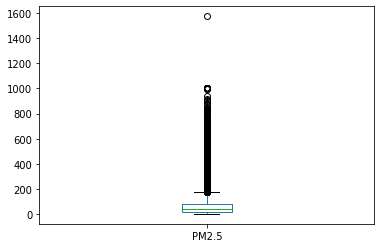

In [43]:
beijing_aq_data['PM2.5'].plot.box()

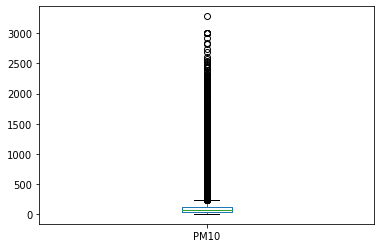

In [44]:
beijing_aq_data['PM10'].plot.box()

In [45]:
beijing_aq_data[beijing_aq_data['PM2.5'] > 1400]

,station_id,utc_datetime,PM2.5,PM10,NO2,CO,O3,SO2
337537,huairou_aq,2018-03-29 14:00:00,1574.0,NaN,32.0,0.5,60.0,5.0


In [46]:
## PM2.5 reading for this day seems to be an outlier. We will drop it

beijing_aq_data.loc[beijing_aq_data[beijing_aq_data.utc_datetime == '2018-3-29 14:00:00'].index].head(10)

,station_id,utc_datetime,PM2.5,PM10,NO2,CO,O3,SO2
328609,aotizhongxin_aq,2018-03-29 14:00:00,23.0,108.0,37.0,0.3,54.0,7.0
329353,badaling_aq,2018-03-29 14:00:00,24.0,203.0,41.0,0.4,61.0,4.0
330097,beibuxinqu_aq,2018-03-29 14:00:00,25.0,140.0,27.0,0.4,65.0,5.0
330841,daxing_aq,2018-03-29 14:00:00,22.0,69.0,40.0,1.4,62.0,5.0
331585,dingling_aq,2018-03-29 14:00:00,156.0,NaN,27.0,0.5,68.0,7.0
332329,donggaocun_aq,2018-03-29 14:00:00,25.0,69.0,29.0,0.4,62.0,8.0
333073,dongsi_aq,2018-03-29 14:00:00,23.0,107.0,37.0,0.3,61.0,11.0
333817,dongsihuan_aq,2018-03-29 14:00:00,20.0,105.0,50.0,0.5,44.0,7.0
334561,fangshan_aq,2018-03-29 14:00:00,21.0,114.0,31.0,0.3,70.0,5.0
335305,fengtaihuayuan_aq,2018-03-29 14:00:00,23.0,77.0,27.0,0.3,78.0,4.0


In [47]:
beijing_aq_data[beijing_aq_data['PM10'] > 3000]

,station_id,utc_datetime,PM2.5,PM10,NO2,CO,O3,SO2
329317,badaling_aq,2018-03-28 02:00:00,327.0,3280.0,37.0,0.7,39.0,2.0


In [48]:
# PM10 is high for that day so we don't drop it.

beijing_aq_data.loc[beijing_aq_data[beijing_aq_data.utc_datetime == '2018-3-28'].index].head(10)

,station_id,utc_datetime,PM2.5,PM10,NO2,CO,O3,SO2
328571,aotizhongxin_aq,2018-03-28,224.0,2178.0,51.0,0.4,28.0,2.0
329315,badaling_aq,2018-03-28,208.0,1795.0,71.0,1.0,2.0,8.0
330059,beibuxinqu_aq,2018-03-28,237.0,499.0,101.0,1.5,2.0,5.0
330803,daxing_aq,2018-03-28,198.0,2486.0,52.0,1.5,35.0,3.0
331547,dingling_aq,2018-03-28,316.0,2835.0,8.0,0.3,65.0,2.0
332291,donggaocun_aq,2018-03-28,131.0,827.0,42.0,1.5,67.0,16.0
333035,dongsi_aq,2018-03-28,213.0,2327.0,47.0,0.6,44.0,2.0
333779,dongsihuan_aq,2018-03-28,87.0,1933.0,82.0,0.7,18.0,4.0
334523,fangshan_aq,2018-03-28,NaN,1785.0,79.0,0.7,29.0,8.0
335267,fengtaihuayuan_aq,2018-03-28,245.0,2465.0,43.0,0.5,50.0,2.0


In [49]:
def process_air_quality_outliers(df):
    outliers_index = df[beijing_aq_data['PM2.5'] > 1400].index
    df = df.drop(outliers_index)
    return df

beijing_aq_data = process_air_quality_outliers(beijing_aq_data)

### Save as interim feather file

In [50]:
beijing_aq_data.reset_index().drop('index', axis=1).to_feather(DATA_PATH + 'interim/beijing_aq_union.feather')

In [51]:
beijing_aq_data = pd.read_feather(DATA_PATH + 'interim/beijing_aq_union.feather')
beijing_aq_data.head()

,station_id,utc_datetime,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,2017-01-01 15:00:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,2017-01-01 16:00:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,2017-01-01 17:00:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,2017-01-01 18:00:00,453.0,520.0,157.0,7.6,4.0,9.0


## Merge Air Quality and Weather Data

### Load and process air quality stations excel file

In [52]:
beijing_aq_stations = pd.read_excel(DATA_PATH + '/raw/Beijing/Beijing_AirQuality_Stations_en.xlsx', names=['station_id', 'longitude', 'latitude'])

In [53]:
def process_aq_stations(df):
    df = df.loc[11:].dropna().reset_index().drop('index', axis=1)
    return df

beijing_aq_stations = process_aq_stations(beijing_aq_stations)

In [54]:
beijing_aq_stations.to_feather(DATA_PATH + 'interim/beijing_aq_stations.feather')

In [10]:
beijing_aq_stations = pd.read_feather(DATA_PATH + 'interim/beijing_aq_stations.feather')

In [11]:
beijing_aq_stations.head()

,station_id,longitude,latitude
0,dongsi_aq,116.417,39.929
1,tiantan_aq,116.407,39.886
2,guanyuan_aq,116.339,39.929
3,wanshouxigong_aq,116.352,39.878
4,aotizhongxin_aq,116.397,39.982


### Load and process weather grid stations

In [57]:
beijing_meo_grid_stations = pd.read_csv(DATA_PATH + 'raw/Beijing/Beijing_grid_weather_station.csv', names=['station_id', 'latitude', 'longitude'])

In [58]:
beijing_meo_grid_stations.head()

,station_id,latitude,longitude
0,beijing_grid_000,39.0,115.0
1,beijing_grid_001,39.1,115.0
2,beijing_grid_002,39.2,115.0
3,beijing_grid_003,39.3,115.0
4,beijing_grid_004,39.4,115.0


### Create weather observed stations list

In [59]:
beijing_observed_meo_union = pd.read_feather(DATA_PATH + 'interim/beijing_meo_observed_union.feather')
beijing_observed_meo_union.head()

,station_id,longitude,latitude,utc_datetime,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [60]:
beijing_meo_observed_stations = beijing_observed_meo_union[['station_id', 'latitude', 'longitude']].drop_duplicates().dropna().reset_index().drop('index', axis=1)
beijing_meo_observed_stations.head()

,station_id,latitude,longitude
0,shunyi_meo,40.126667,116.615278
1,hadian_meo,39.986944,116.290556
2,yanqing_meo,40.449444,115.968889
3,miyun_meo,40.377500,116.864167
4,huairou_meo,40.357778,116.626944


### Save observed weather stations list

In [61]:
beijing_meo_observed_stations.to_feather(DATA_PATH + 'interim/beijing_meo_observed_stations.feather')

In [15]:
beijing_meo_observed_stations = pd.read_feather(DATA_PATH + 'interim/beijing_meo_observed_stations.feather')

In [16]:
beijing_meo_observed_stations.head()

,station_id,latitude,longitude
0,shunyi_meo,40.126667,116.615278
1,hadian_meo,39.986944,116.290556
2,yanqing_meo,40.449444,115.968889
3,miyun_meo,40.377500,116.864167
4,huairou_meo,40.357778,116.626944


### Merge air quality station data with it's nearest neighbor weather station data

In [63]:
from sklearn.neighbors import NearestNeighbors
import itertools
import os

# Create directory to save merged air quality and weather data

os.makedirs(DATA_PATH + 'interim/aq_station_merged', exist_ok=True)

# Load beijing air quality, grid and observed weather stations.

beijing_aq_stations = pd.read_feather(DATA_PATH + 'interim/beijing_aq_stations.feather')

grid_weather_stations = pd.read_csv(DATA_PATH + 'raw/Beijing/Beijing_grid_weather_station.csv', names=['station_id', 'latitude', 'longitude'])
grid_weather_data = pd.read_feather(DATA_PATH + 'interim/beijing_meo_grid.feather')

observed_weather_stations = pd.read_feather(DATA_PATH + 'interim/beijing_meo_observed_stations.feather')
observed_weather_data = pd.read_feather(DATA_PATH + 'interim/beijing_meo_observed_union.feather')

beijing_aq_data = pd.read_feather(DATA_PATH + 'interim/beijing_aq_union.feather')

## Fit NearestNeighbor model to grid and observed weather station's coordinates

grid_nn_model = NearestNeighbors(n_neighbors=2, metric='haversine', n_jobs=-1)
grid_nn_model.fit(grid_weather_stations.set_index('station_id'))

observed_nn_model = NearestNeighbors(n_neighbors=1, metric='haversine', n_jobs=-1)
observed_nn_model.fit(observed_weather_stations.set_index('station_id'))

def process_weather_station_data(df, station_name):
    df = df.iloc[:, 3:].copy()
    new_names = [(i,f"{station_name}_{i}") for i in df.iloc[:, 1:].columns.values]
    return df.rename(columns = dict(new_names))

def output_nn_weather_data(aq_station, latitude, longitude, nn_model, weather_stations, weather_data):
        
    nn_result = nn_model.kneighbors([[latitude, longitude]], return_distance=False)
    
    nn_index = nn_result[0]
    nn_station_names = weather_stations.iloc[nn_index].station_id
    
    weather_data_dfs = [weather_data[weather_data.station_id == weather_station_id] for weather_station_id in nn_station_names]
    weather_data_dfs = [process_weather_station_data(df, station_name) for station_name, df in zip(nn_station_names, weather_data_dfs)]
    
    return weather_data_dfs


In [64]:
# Iterate through each air quality station
for index, aq_station_info in beijing_aq_stations.iterrows():
    
    # Fetch KNN grid station weather data
        
    nn_grid_weather_data = output_nn_weather_data(aq_station_info['station_id'], 
                                                  aq_station_info['latitude'], 
                                                  aq_station_info['longitude'], 
                                                  grid_nn_model,
                                                  grid_weather_stations,
                                                  grid_weather_data)
    
    # Fetch KNN observed station weather data
    
    nn_observed_weather_data = output_nn_weather_data(aq_station_info['station_id'], 
                                                     aq_station_info['latitude'], 
                                                     aq_station_info['longitude'], 
                                                     observed_nn_model,
                                                     observed_weather_stations,
                                                     observed_weather_data)
    
    
    
    # Merge to air station air quality data
    station_aq_data = beijing_aq_data[beijing_aq_data.station_id == aq_station_info['station_id']]
    
    for weather_df in itertools.chain(nn_grid_weather_data, nn_observed_weather_data):
        station_aq_data = station_aq_data.merge(weather_df, on='utc_datetime', how='inner')
        
        
    # Fill-in missing hourly values to impute later.
    date_range_index = pd.date_range(start=station_aq_data.utc_datetime.min(), end=station_aq_data.utc_datetime.max(), freq='H')
    station_aq_data = station_aq_data.set_index('utc_datetime').reindex(date_range_index)
    
    # TODO: Add imputation method here
        
    # Save to interim feather file
    station_aq_data = station_aq_data.drop('station_id', axis=1).reset_index().rename(columns={'index': 'utc_datetime'})
    station_name = aq_station_info['station_id']
    station_aq_data.to_feather(DATA_PATH + f"interim/aq_station_merged/{station_name}_merged_weather.feather")
    

KeyError: "['station_id'] not found in axis"